## Logistic regression --- Used when the solution is of the form 0/1 or yes/no

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df = df.drop(columns = ['User ID'],axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['Gender'] = le.fit_transform(df['Gender'])

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%matplotlib inline

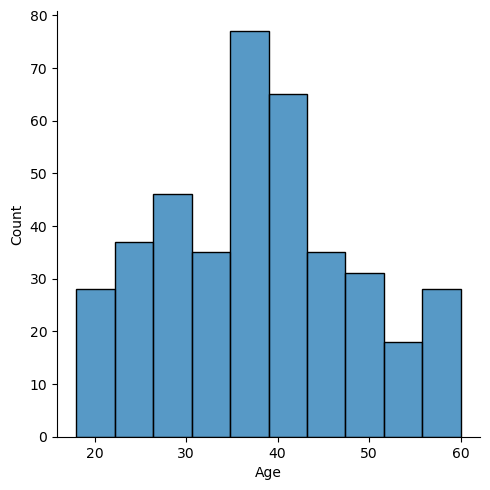

In [11]:
sns.displot(df['Age'])

In [12]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<AxesSubplot:>

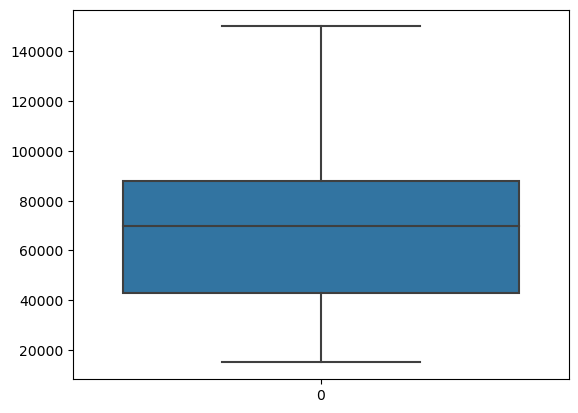

In [13]:
sns.boxplot(data=df['EstimatedSalary'])

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

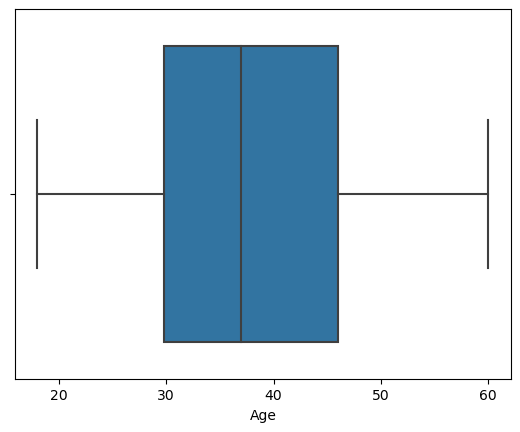

In [14]:
sns.boxplot(df['Age'])

In [15]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

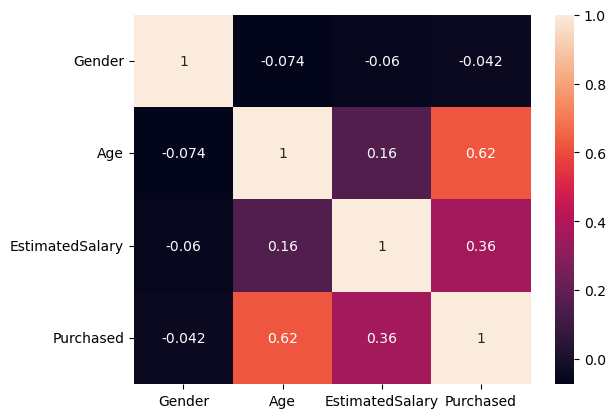

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.corr().Purchased

Gender            -0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

In [18]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [19]:
## x and y split
x = df.drop(columns = ['Purchased'],axis=1)
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [20]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [22]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [38]:
## Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [39]:
x_train.shape

(320, 3)

In [40]:
x_test.shape

(80, 3)

### Model building

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
model.predict([[1,35,75000]])

C:\Users\prate\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

## Evaluation for Classification model

## 1) Accuracy Score

### Accuracy = No. of correct predictions / Total no. of predictions

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,pred)

0.925

## 2) Confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,pred)

array([[58,  0],
       [ 6, 16]], dtype=int64)

In [55]:
pd.crosstab(y_test,pred)
# y is actual side and x is predicted side in below matrix

col_0,0,1
Purchased,,
0,58,0
1,6,16


### True_Negative(TN)           |        False_Positive(FP)
### False_Negative(FN)          |       True_Positive(TP)
### above is the name of the components of the matrix (based on the positive and negative values)

In [51]:
(58+16)/80  # accuracy score

0.925

## Classification report

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



## Precision - 

### precision - out of all positive prediction how many are really positive is called precision
### precision is calculated vertically with the help of confusion matrix
### precision =  TP/(TP+FP)
### precision of 1 = 16/16 = 1
### precision of 0 = 58/(58+6) = 0.91

## Recall -

### recall - out of all actual cases (real positive cases) how many are predicted positively
### recall is calculated horizontally with the help of confusion matrix
### recall = TN/(TN+FP)
### recall of 1 = 16/(16+6) = 0.73
### recall of 0 = 58/58 = 1

## F1 score -

### F1-score = (2 x precision x recall)/(precision+recall)
### F1-score of 0 = (2 x 1 x 0.91)/(0.91+1) = 0.95
### F1-score of 1 = (2 x 1 x 0.73)/(0.73+1) = 0.84

## AUC - ROC Score

In [58]:
probability = model.predict_proba(x_test)[:,1]
probability

array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve

In [62]:
roc_auc_score(y_test,probability)  # auc - area under the curver

0.975705329153605

In [63]:
fpr,tpr,threshold = roc_curve(y_test,probability)

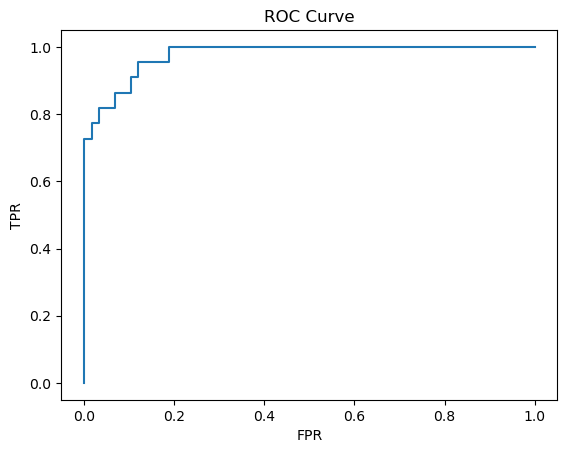

In [65]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')  # FPR - False positive rate
plt.ylabel('TPR')  # TPR - True positive rate
plt.title('ROC Curve')
plt.show()

In [66]:
# AUC score
roc_auc_score(y_test,probability)  # auc - area under the curver

0.975705329153605